In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
# Download stop words list and punkt tokenizer (if not previously downloaded)
nltk.download('stopwords')
nltk.download('punkt')
!pip install gensim
!pip install pyLDAvis
!pip install wordcloud matplotlib
!pip install emoji

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 14.4 MB/s eta 0:00:00


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import re
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import emoji


In [ ]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2025-02-25 13:53:38--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.251.18.207, 142.250.153.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  10.7MB/s    in 1.3s    

2025-02-25 13:53:40 (10.7 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2025-02-25 13:53:40--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.251.18.207, 142.250.153.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting res

In [ ]:
goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

combined_df = pd.concat([goemotions_1, goemotions_2, goemotions_3], ignore_index=True)
emotion_columns = combined_df.columns[9:]

combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s', errors='coerce')
combined_df.to_csv('data/full_dataset/goemotions_combined.csv', index=False)

#emoji

In [35]:
import pandas as pd
import re
import emoji

# Dictionary to store emojis with their positions, texts, and associated labels (emotions)
emoji_dict = {}

# Function to extract emojis and build the dictionary with emotions
def build_emoji_dict(df):
    # Iterate through each row of the DataFrame
    for idx, row in df.iterrows():
        text = row['text']

        # Iterate through the emotion columns
        for emotion_column in emotion_columns:
            if row[emotion_column] == 1:  # Check if the emotion is present
                emotion = emotion_column  # Get the emotion from the column name

                # Iterate through each character in the text to check for emojis
                for char in text:
                    if emoji.is_emoji(char):
                        if char not in emoji_dict:
                            emoji_dict[char] = {'texts': [], 'emotion_count': {}}
                        emoji_dict[char]['texts'].append((idx, text))

                        # Update the emotion count for the current emoji
                        if emotion not in emoji_dict[char]['emotion_count']:
                            emoji_dict[char]['emotion_count'][emotion] = 0
                        emoji_dict[char]['emotion_count'][emotion] += 1

build_emoji_dict(combined_df)
emoji_summary = []

# Populate the summary DataFrame with emoji and their associated emotions
for emoji_char, emotions in emoji_dict.items():
    row = {'Emoji': emoji_char}
    row.update(emotions)  # Add emotion counts to the row
    emoji_summary.append(row)

# Create the DataFrame from the list of rows
emoji_df = pd.DataFrame(emoji_summary)

# Display the resulting table
print(emoji_df)

    Emoji                                              texts  \
0       😇  [(102, Nice! You and her would get along i bet...   
1       🤔  [(132, Funny, the right only seems to say this...   
2       😍  [(168, I love this sub reddit 😍😂), (416, Looks...   
3       😂  [(168, I love this sub reddit 😍😂), (340, I'm s...   
4       🤣  [(246, That’s what’s it’s called or what SHE’S...   
..    ...                                                ...   
257     🐢  [(146943, It took me 14 years to secure my AA ...   
258     🚀  [(148977, Haha, thanks, bot! How's your day go...   
259     🍧  [(151078, How are you all losing weight post-s...   
260     💥  [(156936, 😂😂👸👸👏🙌👏🙌❤❤❤💥💥👑👑💎💎💯💯♀️♀️♀️ Now that's...   
261     🍑  [(158002, Highkey tho! He got ass! 🍑), (200908...   

                                         emotion_count  
0    {'neutral': 3, 'surprise': 1, 'realization': 1...  
1    {'amusement': 9, 'confusion': 17, 'approval': ...  
2    {'love': 29, 'admiration': 35, 'neutral': 20, ...  
3  

In [ ]:
emoji_dict['🤭']

{'texts': [(39569,
   'But then you missed their officiant who looks and sounds like [NAME]! 🤭😳🤣 '),
  (128263,
   'But then you missed their officiant who looks and sounds like [NAME]! 🤭😳🤣 '),
  (147449,
   'But then you missed their officiant who looks and sounds like [NAME]! 🤭😳🤣 ')],
 'emotion_count': {'neutral': 3}}

In [ ]:
emoji_df[['Emoji','emotion_count']]

Emoji                                      emotion_count
0       😇  {'neutral': 3, 'realization': 1, 'surprise': 1...
1       🤔  {'amusement': 9, 'confusion': 17, 'approval': ...
2       😍  {'love': 29, 'admiration': 35, 'neutral': 20, ...
3       😂  {'love': 76, 'disappointment': 38, 'approval':...
4       🤣  {'curiosity': 17, 'disappointment': 11, 'appro...
..    ...                                                ...
257     🐢                   {'neutral': 1, 'realization': 2}
258     🚀   {'amusement': 1, 'curiosity': 3, 'gratitude': 3}
259     🍧  {'curiosity': 2, 'realization': 1, 'annoyance'...
260     💥  {'approval': 4, 'love': 2, 'excitement': 2, 'n...
261     🍑                      {'neutral': 1, 'approval': 1}

[262 rows x 2 columns]

In [39]:
def normalize_emotions(emotion_count):
    total_count = sum(emotion_count.values())
    return {emotion: count / total_count for emotion, count in emotion_count.items()}


emoji_df['normalized_emotion_count'] = emoji_df['emotion_count'].apply(normalize_emotions)

emotion_columns = set()
for emotion_count in emoji_df['normalized_emotion_count']:
    emotion_columns.update(emotion_count.keys())

emotion_matrix = pd.DataFrame(columns=sorted(emotion_columns))

for idx, row in emoji_df.iterrows():
    emoji = row['Emoji']
    normalized_counts = row['normalized_emotion_count']
    emotion_matrix.loc[emoji] = [normalized_counts.get(emotion, 0) for emotion in emotion_matrix.columns]

print(emotion_matrix)



    admiration  amusement     anger  annoyance  approval    caring  confusion  \
😇     0.111111   0.055556  0.000000   0.000000  0.055556  0.000000   0.055556   
🤔     0.022222   0.050000  0.033333   0.066667  0.072222  0.005556   0.094444   
😍     0.198864   0.011364  0.000000   0.000000  0.045455  0.011364   0.000000   
😂     0.044614   0.175271  0.015296   0.048438  0.112173  0.010198   0.019120   
🤣     0.126984   0.176871  0.029478   0.027211  0.063492  0.011338   0.004535   
..         ...        ...       ...        ...       ...       ...        ...   
🐢     0.000000   0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
🚀     0.000000   0.142857  0.000000   0.000000  0.000000  0.000000   0.000000   
🍧     0.000000   0.000000  0.000000   0.250000  0.000000  0.000000   0.000000   
💥     0.000000   0.000000  0.000000   0.000000  0.400000  0.000000   0.000000   
🍑     0.000000   0.000000  0.000000   0.000000  0.500000  0.000000   0.000000   

    curiosity    desire  di

In [40]:
# Create a function to get the top 5 emotions for each emoji along with additional information
def get_emoji_details(normalized_counts, emoji_char):
    # Get the top 5 emotions sorted by their normalized counts
    sorted_emotions = sorted(normalized_counts.items(), key=lambda x: x[1], reverse=True)[:10]

    # Count the number of different emotions the emoji appears in
    unique_emotions_count = len(normalized_counts)

    # Get the number of times the emoji appeared in the dataset
    emoji_appearances = len(emoji_dict[emoji_char]['texts'])

    # Return all relevant information
    return {
        'top_5_emotions': dict(sorted_emotions),
        'appearances': emoji_appearances,
        'unique_emotions': unique_emotions_count
    }

# Apply the function to get the details for each emoji
emoji_df['emoji_details'] = emoji_df['Emoji'].apply(lambda x: get_emoji_details(emoji_df.loc[emoji_df['Emoji'] == x, 'normalized_emotion_count'].values[0], x))

# Print the details for each emoji
for emoji, details in zip(emoji_df['Emoji'], emoji_df['emoji_details']):
    print(f"Emoji: {emoji}")
    print("  Top 5 Emotions:")
    for emotion, count in details['top_5_emotions'].items():
        print(f"    {emotion}: {count:.2f}")
    print(f"  Appearances: {details['appearances']}")
    print(f"  Unique Emotions: {details['unique_emotions']}")
    print()


Emoji: 😇
  Top 5 Emotions:
    neutral: 0.17
    curiosity: 0.17
    love: 0.17
    admiration: 0.11
    surprise: 0.06
    realization: 0.06
    excitement: 0.06
    amusement: 0.06
    confusion: 0.06
    approval: 0.06
  Appearances: 18
  Unique Emotions: 11

Emoji: 🤔
  Top 5 Emotions:
    neutral: 0.20
    curiosity: 0.13
    confusion: 0.09
    approval: 0.07
    disapproval: 0.07
    annoyance: 0.07
    realization: 0.06
    amusement: 0.05
    surprise: 0.04
    optimism: 0.03
  Appearances: 180
  Unique Emotions: 23

Emoji: 😍
  Top 5 Emotions:
    admiration: 0.20
    love: 0.16
    neutral: 0.11
    excitement: 0.11
    joy: 0.08
    curiosity: 0.07
    surprise: 0.06
    approval: 0.05
    optimism: 0.05
    gratitude: 0.04
  Appearances: 176
  Unique Emotions: 16

Emoji: 😂
  Top 5 Emotions:
    amusement: 0.18
    neutral: 0.15
    approval: 0.11
    love: 0.05
    annoyance: 0.05
    admiration: 0.04
    realization: 0.04
    gratitude: 0.04
    curiosity: 0.04
    optimism

In [ ]:
!sudo apt-get install fonts-noto-color-emoji


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-color-emoji is already the newest version (2.042-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


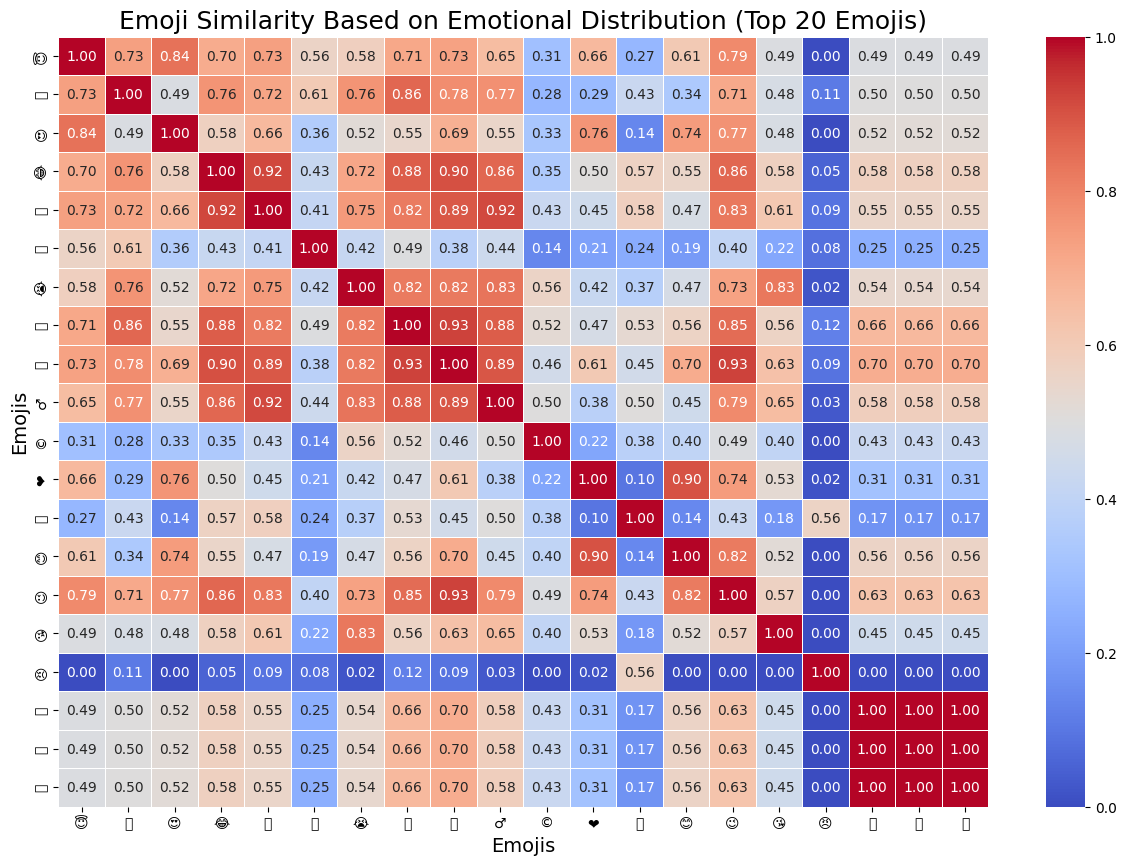

In [41]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')
from matplotlib import rcParams

from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython")

# Select the first 20 emojis
emoji_df_top_20 = emoji_df.head(20)

# Create the emotion matrix for the first 20 emojis
emotion_columns = list(set([key for emo_dict in emoji_df_top_20['emotion_count'] for key in emo_dict.keys()]))
emotion_matrix_min = pd.DataFrame(0, index=emoji_df_top_20['Emoji'], columns=emotion_columns)
emotion_matrix_min = emotion_matrix_min.astype('float64')

# Fill the emotion matrix with normalized emotion counts
for idx, row in emoji_df_top_20.iterrows():
    emoji = row['Emoji']
    emotion_counts = row['emotion_count']
    total_count = sum(emotion_counts.values())
    for emotion, count in emotion_counts.items():
        emotion_matrix_min.loc[emoji, emotion] = float(count) / total_count



# Compute cosine similarity
cosine_sim = cosine_similarity(emotion_matrix_min)

# Create a DataFrame for the cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=emotion_matrix_min.index, columns=emotion_matrix_min.index)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cosine_sim_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


# Set the title and labels
plt.title("Emoji Similarity Based on Emotional Distribution (Top 20 Emojis)", fontsize=18)
plt.xlabel("Emojis", fontsize=14)
plt.ylabel("Emojis", fontsize=14)

# Show the plot
plt.show()


In [42]:

emotion_matrix

admiration  amusement     anger  annoyance  approval    caring  confusion  \
😇     0.111111   0.055556  0.000000   0.000000  0.055556  0.000000   0.055556   
🤔     0.022222   0.050000  0.033333   0.066667  0.072222  0.005556   0.094444   
😍     0.198864   0.011364  0.000000   0.000000  0.045455  0.011364   0.000000   
😂     0.044614   0.175271  0.015296   0.048438  0.112173  0.010198   0.019120   
🤣     0.126984   0.176871  0.029478   0.027211  0.063492  0.011338   0.004535   
..         ...        ...       ...        ...       ...       ...        ...   
🐢     0.000000   0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
🚀     0.000000   0.142857  0.000000   0.000000  0.000000  0.000000   0.000000   
🍧     0.000000   0.000000  0.000000   0.250000  0.000000  0.000000   0.000000   
💥     0.000000   0.000000  0.000000   0.000000  0.400000  0.000000   0.000000   
🍑     0.000000   0.000000  0.000000   0.000000  0.500000  0.000000   0.000000   

    curiosity    desire  disappointment  ...      love  nervousness   neutral  \
😇    0.166667  0.000000        0.000000  ...  0.166667     0.000000  0.166667   
🤔    0.133333  0.011111        0.022222  ...  0.000000     0.005556  0.200000   
😍    0.073864  0.017045        0.000000  ...  0.164773     0.000000  0.113636   
😂    0.042065  0.007648        0.024219  ...  0.048438     0.002549  0.147865   
🤣    0.038549  0.009070        0.024943  ...  0.047619     0.000000  0.192744   
..        ...       ...             ...  ...       ...          ...       ...   
🐢    0.000000  0.000000        0.000000  ...  0.000000     0.000000  0.333333   
🚀    0.428571  0.000000        0.000000  ...  0.000000     0.000000  0.000000   
🍧    0.500000  0.000000        0.000000  ...  0.000000     0.000000  0.000000   
💥    0.000000  0.000000        0.000000  ...  0.200000     0.000000  0.200000   
🍑    0.000000  0.000000        0.000000  ...  0.000000     0.000000  0.500000   

    optimism     pride  realization    relief   remorse   sadness  surprise  
😇   0.000000  0.000000     0.055556  0.000000  0.000000  0.000000  0.055556  
🤔   0.033333  0.000000     0.055556  0.000000  0.000000  0.016667  0.038889  
😍   0.045455  0.000000     0.022727  0.000000  0.000000  0.005682  0.056818  
😂   0.040790  0.003187     0.043977  0.000000  0.000637  0.022945  0.026131  
🤣   0.027211  0.002268     0.065760  0.002268  0.009070  0.043084  0.024943  
..       ...       ...          ...       ...       ...       ...       ...  
🐢   0.000000  0.000000     0.666667  0.000000  0.000000  0.000000  0.000000  
🚀   0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000  
🍧   0.000000  0.000000     0.250000  0.000000  0.000000  0.000000  0.000000  
💥   0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000  
🍑   0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000  

[262 rows x 28 columns]

In [43]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean



# Dictionary to store the similarities or distances between emojis
cosine_distances = {}
euclidean_distances = {}

# Loop through each emoji to calculate the similarity or distance with all other emojis
for emoji1 in emotion_matrix.index:
    cosine_distances[emoji1] = []
    euclidean_distances[emoji1] = []
    for emoji2 in emotion_matrix.index:
        if emoji1 != emoji2:  # Avoid calculating similarity or distance for the emoji with itself
            # Cosine Similarity Calculation between the vectors of the emojis
            cosine_sim = cosine_similarity([emotion_matrix.loc[emoji1]], [emotion_matrix.loc[emoji2]])[0][0]
            cosine_distances[emoji1].append((emoji2, cosine_sim))

            # Euclidean Distance Calculation between the vectors of the emojis
            euclidean_dist = euclidean(emotion_matrix.loc[emoji1], emotion_matrix.loc[emoji2])
            euclidean_distances[emoji1].append((emoji2, euclidean_dist))

# Finding the pair with the highest cosine similarity for each emoji
for emoji1 in cosine_distances:
    most_similar_pair_cosine = max(cosine_distances[emoji1], key=lambda x: x[1])
    print(f"For emoji {emoji1}, the most similar emoji based on Cosine Similarity is {most_similar_pair_cosine[0]} with a similarity of {most_similar_pair_cosine[1]}")

# Finding the pair with the smallest Euclidean distance for each emoji
for emoji1 in euclidean_distances:
    most_similar_pair_euclidean = min(euclidean_distances[emoji1], key=lambda x: x[1])
    print(f"For emoji {emoji1}, the most similar emoji based on Euclidean Distance is {most_similar_pair_euclidean[0]} with a distance of {most_similar_pair_euclidean[1]}")



For emoji 😇, the most similar emoji based on Cosine Similarity is ♾ with a similarity of 0.8609460320922786
For emoji 🤔, the most similar emoji based on Cosine Similarity is 🤷 with a similarity of 0.8629638738932426
For emoji 😍, the most similar emoji based on Cosine Similarity is 🌈 with a similarity of 0.9105140783449688
For emoji 😂, the most similar emoji based on Cosine Similarity is 🤣 with a similarity of 0.9210366575324036
For emoji 🤣, the most similar emoji based on Cosine Similarity is 😂 with a similarity of 0.9210366575324036
For emoji 🤢, the most similar emoji based on Cosine Similarity is 🤮 with a similarity of 0.9124884437491614
For emoji 😭, the most similar emoji based on Cosine Similarity is ♀ with a similarity of 0.871080161943986
For emoji 🤷, the most similar emoji based on Cosine Similarity is ♀ with a similarity of 0.9431044557341159
For emoji 🏻, the most similar emoji based on Cosine Similarity is 😉 with a similarity of 0.9293240544675075
For emoji ♂, the most similar

In [ ]:
cosine_distances

#preprocess

In [81]:
negation_words = ["not", "no", "never", "none", "nobody", "nothing", "neither", "nor", "nowhere", "isn't", "aren't", "wasn't", "weren't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "cannot", "couldn't", "mightn't", "mustn't","don't"]
stop_words = set(stopwords.words('english'))

custom_stop_words = [word for word in stop_words if word not in negation_words]


def preprocess_text(text):
    text = re.sub(r"[<>]", "", text)


    text = re.sub(r'\[(\w+)\]', r'<\1>', text)
    text = emoji.demojize(text)
    text = re.sub(r"[^a-zA-Z0-9<> ]", "", text)

    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stop_words]

    return tokens




combined_df['preprocessed_text'] = combined_df['text'].apply(lambda x: preprocess_text(x))

In [82]:
combined_df[['text','preprocessed_text']]

text  \
0                                         That game hurt.   
1        >sexuality shouldn’t be a grouping category I...   
2          You do right, if you don't care then fuck 'em!   
3                                      Man I love reddit.   
4       [NAME] was nowhere near them, he was by the Fa...   
...                                                   ...   
211220                             Everyone likes [NAME].   
211221  Well when you’ve imported about a gazillion of...   
211222                                 That looks amazing   
211223  The FDA has plenty to criticize. But like here...   
211224  Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...   

                                        preprocessed_text  
0                                            [game, hurt]  
1       [sexuality, shouldnt, grouping, category, make...  
2                           [right, dont, care, fuck, em]  
3                                     [man, love, reddit]  
4                         [<name>, nowhere, near, falcon]  
...                                                   ...  
211220                          [everyone, likes, <name>]  
211221  [well, youve, imported, gazillion, country, ge...  
211222                                   [looks, amazing]  
211223  [fda, plenty, criticize, like, usually, critic...  
211224  [desktop, link, rhelperbot, downvote, remove, ...  

[211225 rows x 2 columns]

In [83]:
from collections import defaultdict

def build_emotion_word_dict(dataframe, text_column, emotion_columns):
    """
    Builds a dictionary where each key is an emotion, and the value is a list of unique words
    that appeared in texts associated with that emotion.

    :param dataframe: DataFrame containing a text column and emotion columns.
    :param text_column: The name of the column containing the text data.
    :param emotion_columns: A list of columns representing emotions.
    :return: A dictionary mapping emotions to lists of words.
    """
    # Initialize a defaultdict with lists
    emotion_word_dict = defaultdict(list)

    # Iterate over each row in the DataFrame
    for _, row in dataframe.iterrows():
        # Extract the words from the text column
        text_words = row[text_column]
        for emotion in emotion_columns:
            if row[emotion] == 1:  # Check if the emotion is associated with this text
                emotion_word_dict[emotion].extend(text_words)

    # Remove duplicate words for each emotion
    # for emotion, words in emotion_word_dict.items():
    #     emotion_word_dict[emotion] = list(set(words))

    return emotion_word_dict

# Example usage
emotion_word_dict = build_emotion_word_dict(combined_df, text_column='preprocessed_text', emotion_columns=emotion_columns)


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer

def get_common_words(subreddit_texts, stop_words=set(), top_n=10):
    all_text = " ".join(subreddit_texts)
    words = re.findall(r'\b[a-zA-Z]+\b', all_text.lower())
    words = [w for w in words if w not in stop_words]
    return Counter(words).most_common(top_n)

def get_ngrams(subreddit_texts, n=2, stop_words=set(), top_n=10):
    all_text = " ".join(subreddit_texts)
    words = re.findall(r'\b[a-zA-Z]+\b', all_text.lower())
    words = [w for w in words if w not in stop_words]
    ngrams = zip(*[words[i:] for i in range(n)])
    return Counter([" ".join(ngram) for ngram in ngrams]).most_common(top_n)

def get_tfidf(subreddit_texts, top_n=10):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=top_n)
    tfidf_matrix = vectorizer.fit_transform(subreddit_texts)
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1
    return sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)

def plot_word_frequencies(subreddit_texts, subreddit_name):
    word_counts = get_common_words(subreddit_texts)
    if not word_counts:
        print(f"No significant words found for subreddit {subreddit_name}")
        return

    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue', edgecolor='black')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Most Common Words in r/{subreddit_name}")
    plt.xticks(rotation=45)
    plt.show()

def build_word_network(subreddit_texts, subreddit_name):
    all_text = " ".join(subreddit_texts)
    words = re.findall(r'\b[a-zA-Z]+\b', all_text)
    words = [word.lower() for word in words if word.lower() not in ENGLISH_STOP_WORDS]

    G = nx.Graph()
    for i in range(len(words) - 1):
        G.add_edge(words[i], words[i+1])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=20, edge_color='gray', alpha=0.7, with_labels=False)
    plt.title(f"Word Network Graph for r/{subreddit_name}")
    plt.show()

In [85]:
import pandas as pd
import numpy as np
from collections import Counter

def calculate_word_statistics(word_list, total_words_in_emotion, total_texts_in_emotion, total_texts):
    """
    Calculates comprehensive word statistics including frequency, TF, log-TF, IDF, TF-IDF, and BM25.

    :param word_list: List of words that appeared with a specific emotion.
    :param total_words_in_emotion: Total number of words across all texts for the emotion.
    :param total_texts_in_emotion: Total number of texts associated with the specific emotion.
    :param total_texts: Total number of texts in the entire dataset.
    :return: A DataFrame with the statistics for each word.
    """
    # Count the frequency of each word
    word_counts = Counter(word_list)

    # Create a DataFrame with the word and its frequency
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

    # Calculate Term Frequency (TF)
    df['TF'] = df['Frequency'] / total_words_in_emotion

    # Calculate log-transformed TF (log-TF)
    df['Log-TF'] = np.log1p(df['TF'])  # log1p to avoid log(0)

    # Calculate Inverse Document Frequency (IDF)
    df['IDF'] = np.log((total_texts + 1) / (total_texts_in_emotion + 1))  # Add 1 to avoid division by zero

    # Calculate TF-IDF
    df['TF-IDF'] = df['TF'] * df['IDF']

    # Calculate BM25 components
    k = 1.5  # Tunable parameter
    b = 0.75  # Tunable parameter
    avg_doc_length = total_words_in_emotion / total_texts_in_emotion
    df['BM25'] = (df['Frequency'] * (k + 1)) / (df['Frequency'] + k * (1 - b + b * (total_words_in_emotion / avg_doc_length)))

    # Calculate a custom importance metric (example: normalized frequency squared)
    df['Custom-Metric'] = (df['Frequency'] / total_words_in_emotion) ** 2

    return df.sort_values(by='Frequency', ascending=False)







In [86]:
list_word_emotoin = []
for i in emotion_columns:
  dict_word = emotion_word_dict[i]
  total_words = len(dict_word)
  total_texts_in_i = combined_df[combined_df[i] == 1].shape[0]
  total_texts = combined_df.shape[0]
  word_statistics = calculate_word_statistics(dict_word, total_words,total_texts_in_i,total_texts)

  list_word_emotoin.append(word_statistics)

In [87]:
for i in range(len(list_word_emotoin)):
  print(emotion_columns[i])
  print(list_word_emotoin[i].head(10))

sadness
       Word  Frequency        TF    Log-TF       IDF    TF-IDF      BM25  \
20       im       1041  0.020652  0.020442  3.442054  0.071086  0.301072   
3    <name>        974  0.019323  0.019139  3.442054  0.066511  0.283895   
41    sorry        864  0.017141  0.016996  3.442054  0.059000  0.255104   
4       sad        785  0.015574  0.015454  3.442054  0.053605  0.233962   
6       not        546  0.010832  0.010774  3.442054  0.037284  0.167503   
224    like        446  0.008848  0.008809  3.442054  0.030456  0.138524   
50      bad        437  0.008670  0.008632  3.442054  0.029841  0.135881   
44     feel        380  0.007539  0.007511  3.442054  0.025949  0.119001   
284      no        329  0.006527  0.006506  3.442054  0.022466  0.103692   
34     dont        327  0.006487  0.006466  3.442054  0.022330  0.103088   

     Custom-Metric  
20        0.000427  
3         0.000373  
41        0.000294  
4         0.000243  
6         0.000117  
224       0.000078  
50      

In [88]:
words_for_joy = emotion_word_dict['joy']
total_words_in_joy = len(words_for_joy)
total_texts_in_joy = combined_df[combined_df['joy'] == 1].shape[0]
total_texts = combined_df.shape[0]
# Compute the statistics
word_statistics = calculate_word_statistics(words_for_joy, total_words_in_joy,total_texts_in_joy,total_texts)
print(word_statistics)

         Word  Frequency        TF    Log-TF       IDF    TF-IDF      BM25  \
38         im       1186  0.020829  0.020615  3.275489  0.068224  0.291623   
0       happy       1179  0.020706  0.020494  3.275489  0.067821  0.290101   
1      <name>       1132  0.019880  0.019685  3.275489  0.065117  0.279831   
39       glad        884  0.015525  0.015406  3.275489  0.050851  0.224019   
30       like        673  0.011819  0.011750  3.275489  0.038714  0.174276   
...       ...        ...       ...       ...       ...       ...       ...   
5223  pierced          1  0.000018  0.000018  3.275489  0.000058  0.000278   
5230      10k          1  0.000018  0.000018  3.275489  0.000058  0.000278   
5231   images          1  0.000018  0.000018  3.275489  0.000058  0.000278   
5232    verse          1  0.000018  0.000018  3.275489  0.000058  0.000278   
8244  hostile          1  0.000018  0.000018  3.275489  0.000058  0.000278   

      Custom-Metric  
38     4.338296e-04  
0      4.287236e-04

In [89]:
def find_word_overlap(emotion_word_dict):
    """
    Finds overlapping words between different emotion categories and calculates their occurrences
    across the emotions.

    :param emotion_word_dict: Dictionary where keys are emotions and values are lists of words.
    :return: A DataFrame showing words, the emotions they appear in, and their counts in each emotion.
    """
    from collections import defaultdict

    # Create a dictionary to track words across emotions
    word_emotion_count = defaultdict(lambda: defaultdict(int))

    # Count occurrences of each word per emotion
    for emotion, words in emotion_word_dict.items():
        for word in words:
            word_emotion_count[word][emotion] += 1

    # Convert to DataFrame
    rows = []
    for word, emotions in word_emotion_count.items():
        row = {'Word': word}
        row.update(emotions)  # Add counts for each emotion
        rows.append(row)

    df = pd.DataFrame(rows)
    df = df.fillna(0).astype({'Word': 'str'})  # Replace NaN with 0
    return df.sort_values(by='Word')

In [90]:
overlap_df = find_word_overlap(emotion_word_dict)


In [91]:
def calculate_metrics(df, emotion_columns):
    """
    Calculates multiple metrics for a DataFrame with words and their occurrences across specific emotions.

    :param df: DataFrame where the first column is "Word" and subsequent columns are emotion counts.
    :param emotion_columns: List of columns corresponding to specific emotions.
    :return: DataFrame with additional metrics.
    """
    # Copy the DataFrame to avoid overwriting the original
    df = df.copy()

    # Convert emotion columns to numeric, replacing non-numeric values with 0
    for col in emotion_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    # Add EmotionCount (number of emotions with non-zero values for the word)
    df['EmotionCount'] = (df[emotion_columns] > 0).sum(axis=1)

    # Add EmotionsWithWord (list of emotions where the word appears)
    df['EmotionsWithWord'] = df[emotion_columns].apply(
        lambda x: ', '.join([col for col in emotion_columns if x[col] > 0]), axis=1
    )

    # 1. Normalization by emotion (relative weight of each word in the emotion)
    for emotion in emotion_columns:
        total = df[emotion].sum()
        if total > 0:
            df[f'Normalized_{emotion}'] = df[emotion] / total
        else:
            df[f'Normalized_{emotion}'] = 0

    # 2. Overlap score (number of emotions the word appears in)
    df['Overlap'] = df[emotion_columns].astype(bool).sum(axis=1)

    # 3. TF-IDF for each emotion
    N = len(emotion_columns)  # Number of emotions
    df['DF'] = df[emotion_columns].gt(0).sum(axis=1)  # Document Frequency
    for emotion in emotion_columns:
        total = df[emotion].sum()
        if total > 0:
            df[f'TF-IDF_{emotion}'] = (df[emotion] / total) * np.log(N / df['DF'])
        else:
            df[f'TF-IDF_{emotion}'] = 0

    # 4. Unique word indicator (appears in only one emotion)
    df['IsUnique'] = (df['Overlap'] == 1).astype(int)

    return df


    return df
overlap_df_stas = calculate_metrics(overlap_df,emotion_columns)
# overlap_df_stas = overlap_df_stas.drop(columns=emotion_columns)

In [93]:
overlap_df_stas

Word  sadness  neutral  love  gratitude  disapproval  \
1934                      0      6.0     43.0   2.0        4.0         14.0   
12836                    00      0.0      9.0   0.0        0.0          0.0   
33545                000001      0.0      0.0   0.0        0.0          0.0   
8573   00000100001001001000      0.0      2.0   0.0        0.0          0.0   
22599                 00001      0.0      2.0   0.0        0.0          0.0   
...                     ...      ...      ...   ...        ...          ...   
16130              zugzwang      0.0      3.0   0.0        0.0          0.0   
32392               zullily      0.0      0.0   0.0        0.0          0.0   
28119                 zumba      0.0      0.0   0.0        3.0          0.0   
19982                zzzzzz      0.0      2.0   0.0        0.0          0.0   
29855               zzzzzzz      0.0      0.0   0.0        0.0          0.0   

       amusement  disappointment  disgust  admiration  ...  TF-IDF_amusement  \
1934         3.0             5.0      5.0         3.0  ...          0.000007   
12836        0.0             0.0      0.0         0.0  ...          0.000000   
33545        0.0             0.0      0.0         0.0  ...          0.000000   
8573         0.0             0.0      0.0         0.0  ...          0.000000   
22599        0.0             2.0      0.0         0.0  ...          0.000000   
...          ...             ...      ...         ...  ...               ...   
16130        0.0             1.0      0.0         0.0  ...          0.000000   
32392        0.0             0.0      0.0         0.0  ...          0.000000   
28119        0.0             0.0      0.0         0.0  ...          0.000000   
19982        0.0             0.0      0.0         0.0  ...          0.000000   
29855        2.0             0.0      0.0         1.0  ...          0.000058   

       TF-IDF_grief  TF-IDF_annoyance  TF-IDF_caring  TF-IDF_disgust  \
1934            0.0          0.000007            0.0        0.000019   
12836           0.0          0.000000            0.0        0.000000   
33545           0.0          0.000000            0.0        0.000000   
8573            0.0          0.000000            0.0        0.000000   
22599           0.0          0.000000            0.0        0.000000   
...             ...               ...            ...             ...   
16130           0.0          0.000000            0.0        0.000000   
32392           0.0          0.000016            0.0        0.000000   
28119           0.0          0.000000            0.0        0.000000   
19982           0.0          0.000021            0.0        0.000000   
29855           0.0          0.000000            0.0        0.000000   

       TF-IDF_disapproval  TF-IDF_neutral  TF-IDF_joy  TF-IDF_relief  IsUnique  
1934             0.000024        0.000017    0.000008       0.000031         0  
12836            0.000000        0.000078    0.000000       0.000000         1  
33545            0.000000        0.000000    0.000000       0.000000         0  
8573             0.000000        0.000017    0.000000       0.000000         1  
22599            0.000000        0.000012    0.000000       0.000000         0  
...                   ...             ...         ...            ...       ...  
16130            0.000000        0.000017    0.000000       0.000000         0  
32392            0.000000        0.000000    0.000000       0.000000         0  
28119            0.000000        0.000000    0.000000       0.000000         0  
19982            0.000000        0.000012    0.000000       0.000000         0  
29855            0.000000        0.000000    0.000068       0.000000         0  

[33565 rows x 90 columns]

In [92]:
overlap_df_stas.describe()

sadness       neutral          love     gratitude   disapproval  \
count  33565.000000  33565.000000  33565.000000  33565.000000  33565.000000   
mean       1.501743     11.412453      1.690422      2.236467      2.719738   
std       14.150784     97.407801     32.488582     37.931697     27.205358   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        0.000000      2.000000      0.000000      0.000000      0.000000   
75%        0.000000      5.000000      0.000000      0.000000      1.000000   
max     1041.000000  11879.000000   5123.000000   4676.000000   2664.000000   

          amusement  disappointment       disgust   admiration  realization  \
count  33565.000000    33565.000000  33565.000000  33565.00000  33565.00000   
mean       1.995323        2.008521      1.189275      3.51795      2.12093   
std       24.567746       16.709494      9.948387     35.09624     16.78370   
min        0.000000        0.000000      0.000000      0.00000      0.00000   
25%        0.000000        0.000000      0.000000      0.00000      0.00000   
50%        0.000000        0.000000      0.000000      0.00000      0.00000   
75%        0.000000        1.000000      0.000000      1.00000      1.00000   
max     3233.000000     1442.000000    858.000000   3125.00000   1288.00000   

       ...  TF-IDF_amusement  TF-IDF_grief  TF-IDF_annoyance  TF-IDF_caring  \
count  ...      33565.000000  33565.000000      33565.000000   33565.000000   
mean   ...          0.000008      0.000006          0.000008       0.000006   
std    ...          0.000021      0.000047          0.000014       0.000018   
min    ...          0.000000      0.000000          0.000000       0.000000   
25%    ...          0.000000      0.000000          0.000000       0.000000   
50%    ...          0.000000      0.000000          0.000000       0.000000   
75%    ...          0.000000      0.000000          0.000015       0.000000   
max    ...          0.000523      0.002670          0.000455       0.000362   

       TF-IDF_disgust  TF-IDF_disapproval  TF-IDF_neutral    TF-IDF_joy  \
count    33565.000000        33565.000000    33565.000000  33565.000000   
mean         0.000008            0.000008        0.000011      0.000007   
std          0.000024            0.000015        0.000010      0.000019   
min          0.000000            0.000000        0.000000      0.000000   
25%          0.000000            0.000000        0.000000      0.000000   
50%          0.000000            0.000000        0.000009      0.000000   
75%          0.000000            0.000013        0.000015      0.000000   
max          0.001039            0.000269        0.000391      0.000687   

       TF-IDF_relief      IsUnique  
count   33565.000000  33565.000000  
mean        0.000007      0.081245  
std         0.000037      0.273216  
min         0.000000      0.000000  
25%         0.000000      0.000000  
50%         0.000000      0.000000  
75%         0.000000      0.000000  
max         0.001601      1.000000  

[8 rows x 88 columns]

#word2vec

In [94]:
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

def train_word2vec_by_emotion(emotion_dict, vector_size=100, window=5, min_count=1, epochs=10):
    """
    Train Word2Vec models for each emotion and a combined model for all words.

    :param emotion_dict: Dictionary where keys are emotion labels and values are lists of words for each emotion.
    :param vector_size: Size of the embedding vectors.
    :param window: Maximum distance between the current and predicted word within a sentence.
    :param min_count: Ignores all words with total frequency lower than this.
    :param epochs: Number of training iterations for the Word2Vec model.
    :return: Dictionary of Word2Vec models for each emotion, including a combined 'AllWords' model.
    """
    emotion_models = {}

    # Train Word2Vec model for each emotion
    for emotion, words in emotion_dict.items():
        sentences = [[word] for word in words]  # Treat each word as its own "sentence"
        model = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count, epochs=epochs)
        emotion_models[emotion] = model

    # Combine all words into a single list for 'AllWords'
    all_words = []
    for words in emotion_dict.values():
        all_words.extend(words)
    all_sentences = [[word] for word in all_words]

    # Train the combined 'AllWords' model
    all_words_model = Word2Vec(sentences=all_sentences, vector_size=vector_size, window=window, min_count=min_count, epochs=epochs)
    emotion_models['AllWords'] = all_words_model

    return emotion_models

def calculate_emotion_distances(emotion_models):
    """
    Calculate pairwise vector distances between emotions based on Word2Vec embeddings.

    :param emotion_models: Dictionary of Word2Vec models trained for each emotion.
    :return: Dictionary with distances between each pair of emotions.
    """
    emotion_vectors = {}
    # Calculate the mean vector for each emotion
    for emotion, model in emotion_models.items():
        words = list(model.wv.index_to_key)
        vectors = [model.wv[word] for word in words]
        emotion_vectors[emotion] = sum(vectors) / len(vectors)  # Mean vector for the emotion

    # Compute pairwise distances
    distances = {}
    emotions = list(emotion_vectors.keys())
    for i, emotion1 in enumerate(emotions):
        for j, emotion2 in enumerate(emotions):
            if i < j:  # Avoid duplicate calculations
                dist = cosine(emotion_vectors[emotion1], emotion_vectors[emotion2])
                distances[(emotion1, emotion2)] = dist
    return distances
emotion_models = train_word2vec_by_emotion(emotion_word_dict, vector_size=50, epochs=20)


In [95]:
dist_emotion = calculate_emotion_distances(emotion_models)

In [96]:
distance_df = pd.DataFrame(
    [(emotion1, emotion2, distance) for (emotion1, emotion2), distance in dist_emotion.items()],
    columns=["Emotion 1", "Emotion 2", "Distance"]
)
distance_df

Emotion 1    Emotion 2  Distance
0     sadness      neutral  0.635829
1     sadness         love  0.046427
2     sadness    gratitude  0.046946
3     sadness  disapproval  0.288196
4     sadness    amusement  0.039367
..        ...          ...       ...
401    desire         fear  0.071403
402    desire     AllWords  0.741454
403    relief         fear  0.231412
404    relief     AllWords  0.832466
405      fear     AllWords  0.745989

[406 rows x 3 columns]

In [97]:
pip install holoviews


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
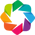

:Chord   [start,end]

In [104]:
import pandas as pd
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')
threshold = 0.5
filtered_df = distance_df[distance_df["Distance"] > threshold]

chord_data = [(row["Emotion 1"], row["Emotion 2"], row["Distance"]) for _, row in filtered_df.iterrows()]
chord = hv.Chord(chord_data)

chord.opts(
    opts.Chord(
        cmap='Category20',
        edge_cmap='viridis',
        edge_color='Distance',
        labels='name',
        node_size=30,
        node_color='index',
        width=600,
        height=600
    )
)

chord


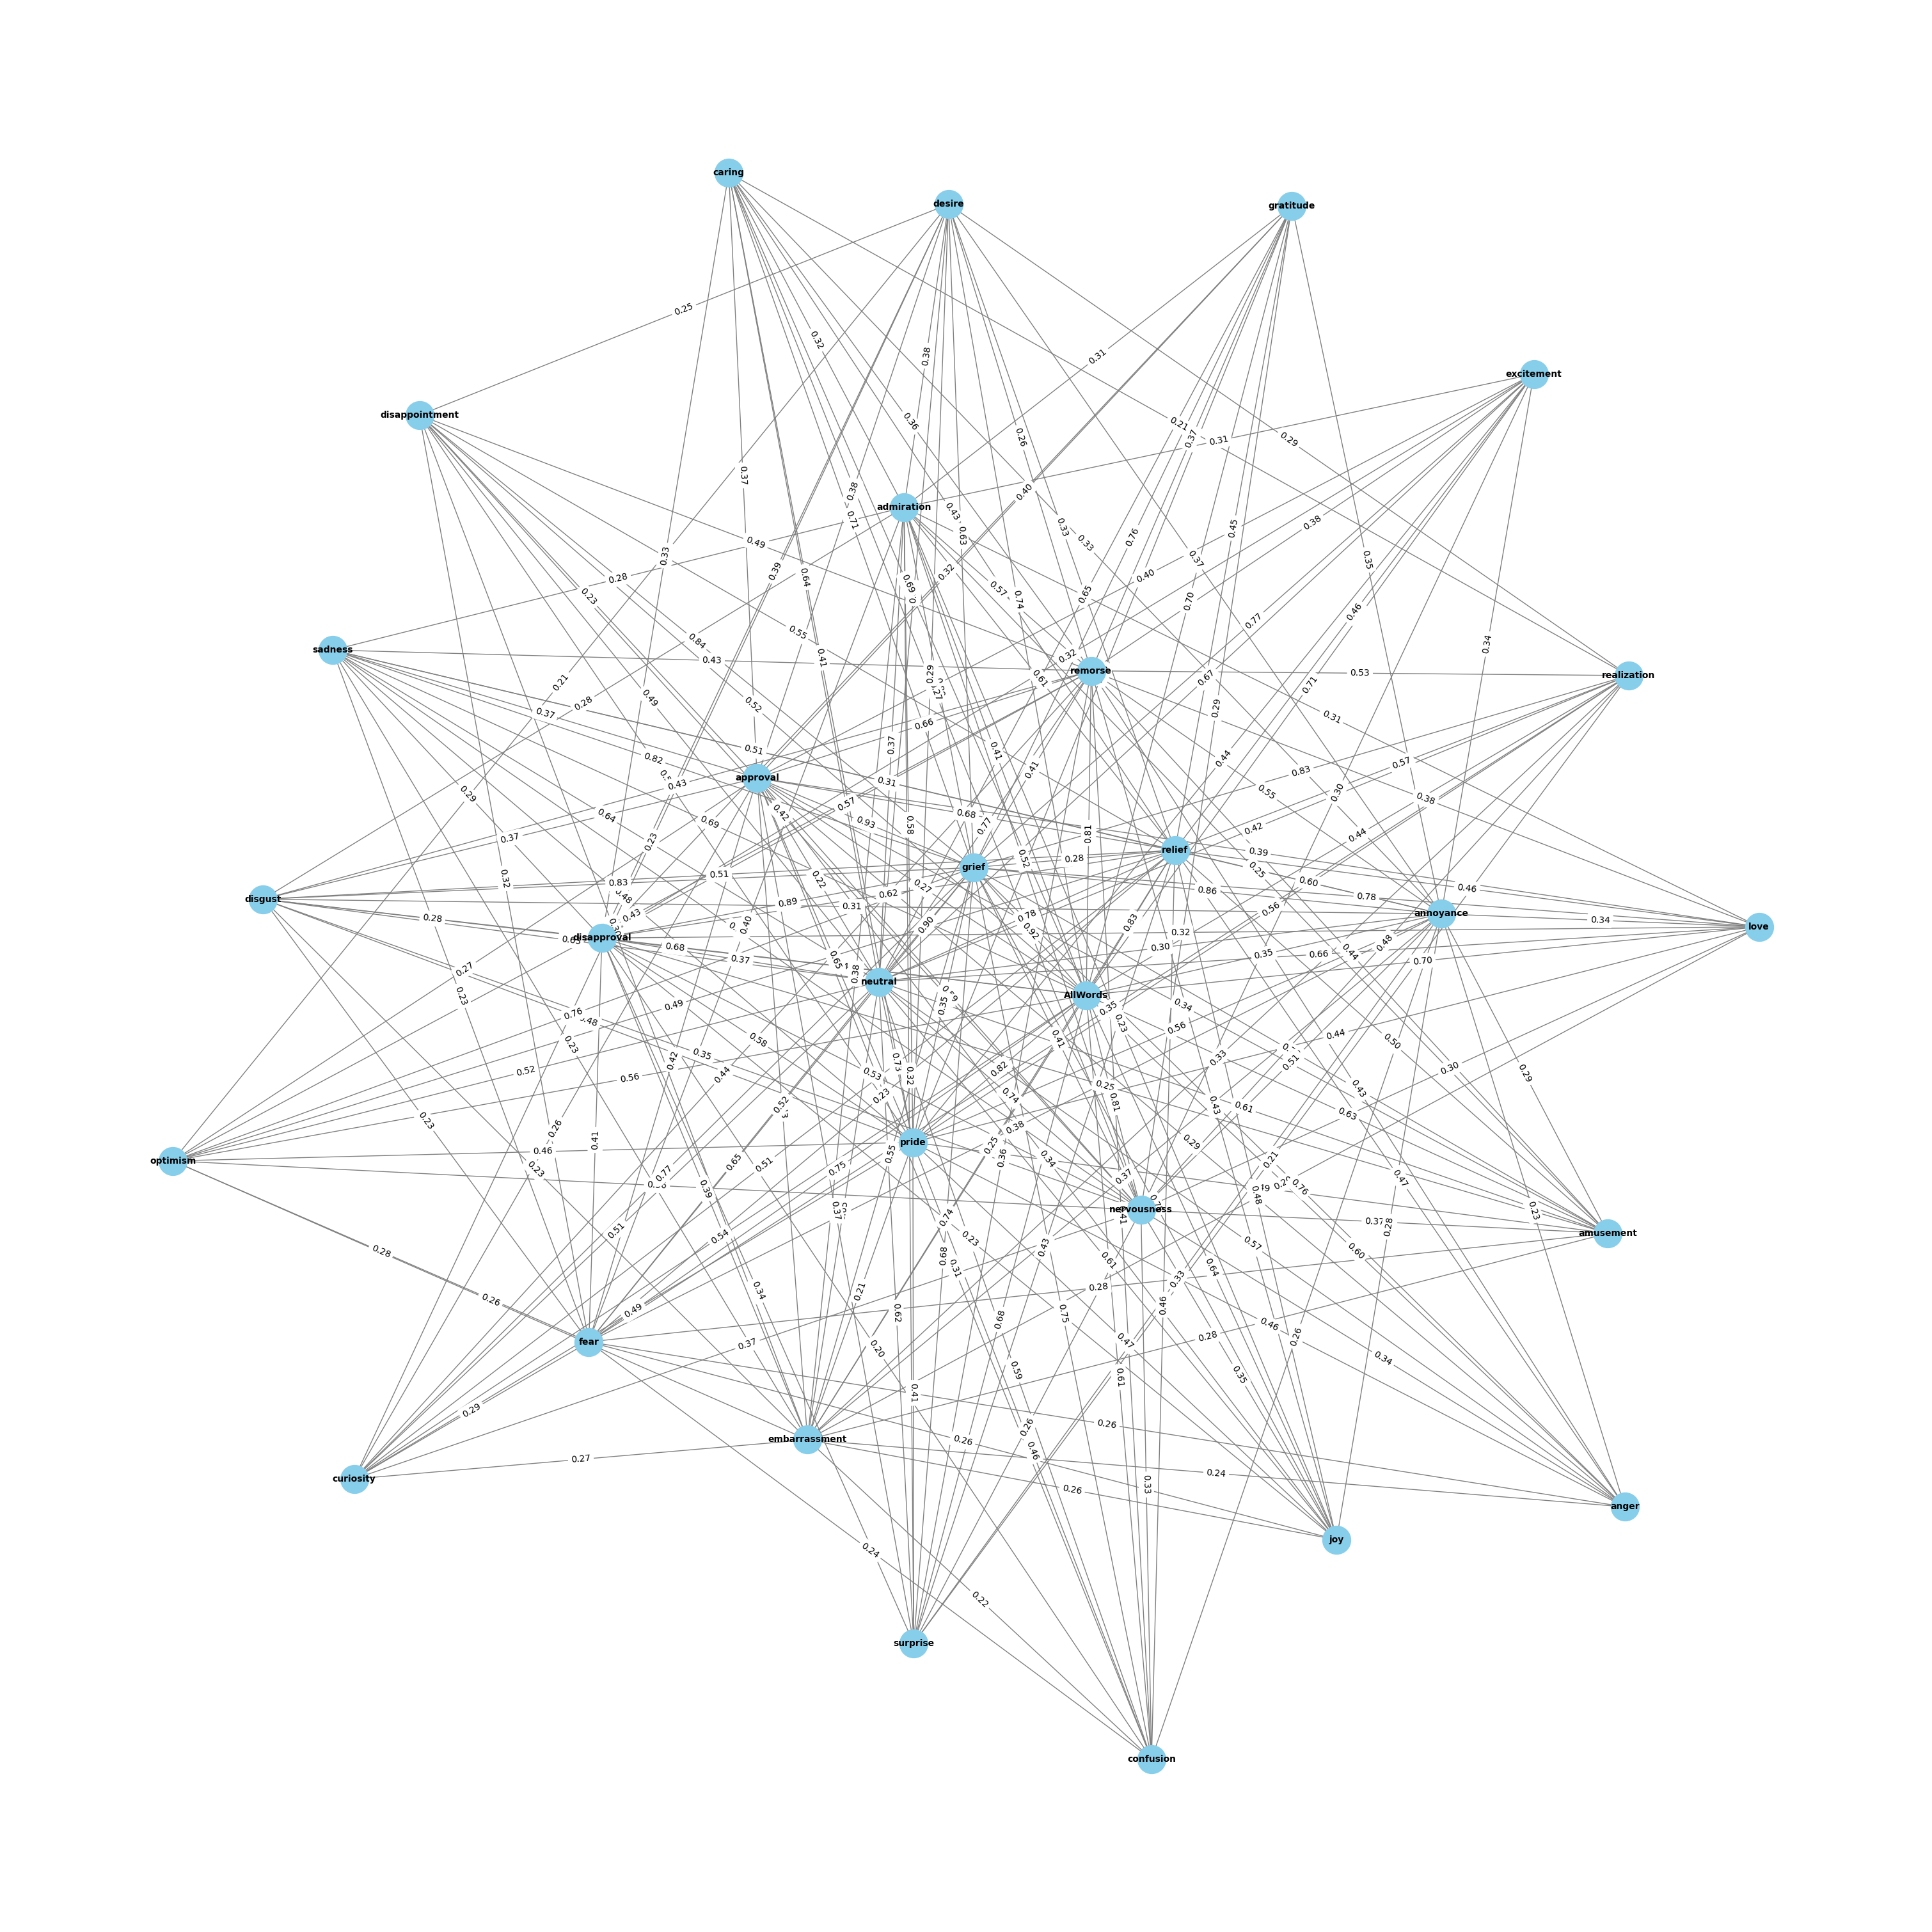

In [107]:
import pandas as pd
import holoviews as hv
from holoviews import opts
import networkx as nx
import matplotlib.pyplot as plt

threshold = 0.2
filtered_df = distance_df[distance_df["Distance"] > threshold]



G = nx.Graph()

for emotion in pd.concat([filtered_df["Emotion 1"], filtered_df["Emotion 2"]]).unique():
    G.add_node(emotion)

for _, row in filtered_df.iterrows():
    G.add_edge(row["Emotion 1"], row["Emotion 2"], weight=row["Distance"])

plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

edges = G.edges(data=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in edges})

plt.show()


#STOPE

#attinsh is all wht you need

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EmotionVectorModel(nn.Module):
    def __init__(self, embed_dim, num_heads, vocab_size, num_emotions):
        super(EmotionVectorModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.attention = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)
        self.emotion_embedding = nn.Embedding(num_emotions, embed_dim)

    def forward(self, input_ids, attention_mask, emotion_id):
        embeddings = self.embedding(input_ids)

        emotion_vector = self.emotion_embedding(emotion_id).unsqueeze(1)
        embeddings = embeddings + emotion_vector

        key_padding_mask = ~attention_mask.to(torch.bool)

        attn_output, _ = self.attention(
            embeddings, embeddings, embeddings, key_padding_mask=key_padding_mask
        )

        return attn_output


In [ ]:
def create_emotion_dict(dataframe, tokenizer, emotion_columns):

    emotion_dict = {emotion: [] for emotion in emotion_columns}

    for _, row in dataframe.iterrows():
        text = " ".join(row['preprocessed_text'])

        tokenized = tokenizer(
            text,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
            max_length=128
        )

        for emotion in emotion_columns:
            if row[emotion] == 1:
                emotion_dict[emotion].append({
                    'input_ids': tokenized['input_ids'].squeeze(0),
                    'attention_mask': tokenized['attention_mask'].squeeze(0),
                    'label': torch.tensor(1.0, dtype=torch.float)
                })
    return emotion_dict


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

emotion_dict = create_emotion_dict(combined_df, tokenizer, emotion_columns)


In [ ]:
def generate_emotion_vectors(emotion_dict, model):

    emotion_vectors = {}

    for emotion, examples in emotion_dict.items():
        emotion_vectors[emotion] = []
        for example in examples:
            input_ids = example['input_ids'].unsqueeze(0)
            attention_mask = example['attention_mask'].unsqueeze(0)
            emotion_id = torch.tensor([emotion_columns.index(emotion)]).long()

            with torch.no_grad():
                vectors = model(input_ids, attention_mask, emotion_id)

            emotion_vectors[emotion].append(vectors.squeeze(0).numpy())

    return emotion_vectors


In [ ]:
embed_dim = 128
num_heads = 8
vocab_size = 10000
num_emotions = len(emotion_columns)
model = EmotionVectorModel(embed_dim, num_heads, vocab_size, num_emotions)

emotion_vectors = generate_emotion_vectors(emotion_dict, model)

for emotion, vectors in emotion_vectors.items():
    print(f"Emotion: {emotion}, Number of examples: {len(vectors)}")
    print(f"First example vector shape: {vectors[0].shape}")


AttributeError: 'Index' object has no attribute 'index'

In [ ]:
from scipy.spatial.distance import cosine, euclidean

def calculate_word_distances(emotion_vectors, method="cosine"):

    distances = {}

    for emotion, vectors in emotion_vectors.items():
        distances[emotion] = []
        for vector_set in vectors:
            for i in range(len(vector_set)):
                for j in range(i + 1, len(vector_set)):
                    if method == "cosine":
                        dist = cosine(vector_set[i], vector_set[j])
                    elif method == "euclidean":
                        dist = euclidean(vector_set[i], vector_set[j])
                    distances[emotion].append(dist)
    return distances

distances = calculate_word_distances(emotion_vectors, method="cosine")
print(distances)


In [ ]:
import torch
import torch.nn as nn

class EmotionVectorModel(nn.Module):
    def __init__(self, embed_dim, num_heads, vocab_size, num_emotions):
        super(EmotionVectorModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.attention = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)
        self.emotion_embedding = nn.Embedding(num_emotions, embed_dim)

    def forward(self, input_ids, attention_mask, emotion_id):
        embeddings = self.embedding(input_ids)

        emotion_vector = self.emotion_embedding(emotion_id).unsqueeze(1)

        embeddings = embeddings + emotion_vector

        key_padding_mask = ~attention_mask.to(torch.bool)

        attn_output, _ = self.attention(
            embeddings, embeddings, embeddings, key_padding_mask=key_padding_mask
        )

        return attn_output


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(text):
    return tokenizer(
        text,
        max_length=128,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )


In [ ]:
emotion_map = {emotion: idx for idx, emotion in enumerate(emotion_columns)}


In [ ]:
embed_dim = 64
num_heads = 4
vocab_size = tokenizer.vocab_size
num_emotions = len(emotion_columns)

model = EmotionVectorModel(embed_dim, num_heads, vocab_size, num_emotions)


text = combined_df['preprocessed_text']
tokenized = tokenize_function(text)
input_ids = tokenized['input_ids']
attention_mask = tokenized['attention_mask']
emotion_id = torch.tensor([emotion_map['joy']])

with torch.no_grad():
    vector_output = model(input_ids, attention_mask, emotion_id)

print("Vector output shape:", vector_output.shape)


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

tensor([[[-0.6110, -0.0597, -0.0600,  ..., -0.1180, -0.2386,  0.8235],
         [-0.6320,  0.1860,  0.5712,  ..., -0.2277, -0.2162,  0.7453],
         [-0.7074,  0.0901,  0.2041,  ..., -0.2522, -0.1497,  0.8194],
         ...,
         [-0.6724,  0.0412,  0.1083,  ..., -0.2751, -0.2504,  0.8317],
         [-0.6724,  0.0412,  0.1083,  ..., -0.2751, -0.2504,  0.8317],
         [-0.6724,  0.0412,  0.1083,  ..., -0.2751, -0.2504,  0.8317]]])

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(text):
    return tokenizer(
        text,
        max_length=128,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )

combined_df['tokenized'] = combined_df['preprocessed_text'].apply(
    lambda x: tokenize_function(" ".join(x))
)


In [ ]:
emotion_tokenizer_dict = build_emotion_word_dict(combined_df, text_column='tokenized', emotion_columns=emotion_columns)


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)


In [ ]:
class GoEmotionsSingleLabelDataset(Dataset):
    def __init__(self, dataframe, tokenizer, target_emotion, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.target_emotion = target_emotion
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = " ".join(row['preprocessed_text'])

        # Convert target emotion to tensor (Binary classification: 1 or 0)
        label = torch.tensor(row[self.target_emotion], dtype=torch.float)

        encoded = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'label': label
        }


In [ ]:
joy_dataset = GoEmotionsSingleLabelDataset(train_df, tokenizer, target_emotion="joy")
sample = joy_dataset[0]

for i in range(5):
    sample = joy_dataset[i]
    print(f"Sample {i}:")
    print("Text IDs:", sample['input_ids'])
    print("Label:", sample['label'])
    print("Attention Mask:", sample['attention_mask'])
    print("---")

In [ ]:
class TransformerEmotionClassifier(nn.Module):
    def __init__(self, embed_dim, num_heads, vocab_size):
        super(TransformerEmotionClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.attention = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)
        self.fc = nn.Linear(embed_dim, 1)

    def forward(self, input_ids, attention_mask):
        embeddings = self.embedding(input_ids)

        # Ensure attention_mask is bool and in correct shape
        attention_mask = attention_mask.to(torch.bool).T

        attn_output, _ = self.attention(
            embeddings, embeddings, embeddings, key_padding_mask=~attention_mask
        )

        pooled_output = attn_output.mean(dim=1)
        return self.fc(pooled_output)


In [ ]:
embed_dim = 64
num_heads = 4
vocab_size = 30522


emotion_models = {emotion: EmotionAttentionModel(embed_dim, num_heads, vocab_size) for emotion in emotion_columns}


In [ ]:
def train_emotion_model(model, dataloader, optimizer, criterion, num_epochs=3, device='cpu'):
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)  # ודא שזה נכון
            labels = batch['labels'].to(device)

            # Ensure attention_mask is bool
            attention_mask = attention_mask.to(torch.bool)

            optimizer.zero_grad()
            logits = model(input_ids, attention_mask)
            loss = criterion(logits.view(-1), labels.view(-1))
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(dataloader):.4f}")


In [ ]:
from torch.utils.data import DataLoader

# יצירת DataLoader עבור רגשות
batch_size = 16
for emotion in emotion_columns:
    # DataLoader עבור הרגש
    emotion_dataset = GoEmotionsDataset(train_df, tokenizer, [emotion])
    emotion_dataloader = DataLoader(emotion_dataset, batch_size=batch_size, shuffle=True)
    print(emotion_dataset)
    # הגדרת המודל, קריטריון, ואופטימיזציה
    model = emotion_models[emotion]
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    criterion = nn.BCEWithLogitsLoss()

    # אימון
    print(f"Training model for emotion: {emotion}")
    train_emotion_model(model, emotion_dataloader, optimizer, criterion)


Training model for emotion: admiration


KeyboardInterrupt: 

In [ ]:
def predict_emotion(model, dataloader, device='cuda'):
    model = model.to(device)
    model.eval()
    predictions = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            logits = model(input_ids, attention_mask)
            preds = torch.sigmoid(logits).cpu().numpy()
            predictions.extend(preds)
    return predictions


In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

for emotion in emotion_columns:
    model = emotion_models[emotion]
    print(f"Predicting for emotion: {emotion}")
    predictions = predict_emotion(model, test_dataloader)
    # חישוב המטריקות (F1, Precision, Recall וכו')


#Vocabulary

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import torch

class Vocabulary:
    def __init__(self, default_indexes=None):
        if default_indexes is None:
            default_indexes = {}
        self.default_indexes = default_indexes
        self.init()

    def init(self):
        self.index_to_word = {**self.default_indexes}
        self.word_to_index = {word: idx for idx, word in self.index_to_word.items()}
        self.word_counts = Counter()
        self.num_words = len(self.default_indexes)
        for word in self.index_to_word:
            self.word_counts[word] = 1
        self.embedding_matrix = None
        self.vector_size = 300

    def index_words(self, word_list):
        for word in word_list:
            self.index_word(word)

    def __len__(self):
        return len(self.word_to_index)

    def index_word(self, word, cnt=None):
        if word not in self.word_to_index:
            idx = len(self.index_to_word)
            self.index_to_word[idx] = word
            self.word_to_index[word] = idx
            self.word_counts[word] = cnt if cnt is not None else 1
            self.num_words += 1
        else:
            self.word_counts[word] += cnt if cnt is not None else 1

    def get_words(self, indices):
        return [self.index_to_word.get(i, None) for i in indices]

    def build_embedding_matrix(self, word2vec_model, embed_dim=300, init='random'):
        if init == 'zeros':
            self.embedding_matrix = np.zeros((self.num_words, embed_dim))
        elif init == 'random':
            self.embedding_matrix = np.random.rand(self.num_words, embed_dim)
        else:
            raise ValueError("Unknown initialization method")

        for idx, word in self.index_to_word.items():
            if word in word2vec_model:
                self.embedding_matrix[idx] = word2vec_model[word]
            else:
                if init == 'random':
                    self.embedding_matrix[idx] = np.random.rand(embed_dim)
                else:
                    self.embedding_matrix[idx] = np.zeros(embed_dim)

        return self.embedding_matrix

    def get_word_vector(self, word):
        word_idx = self.get_word_index(word)
        if word_idx is not None:
            return self.embedding_matrix[word_idx]
        print(f"Word '{word}' not found in vocabulary!")
        return None

    def get_word_index(self, word):
        return self.word_to_index.get(word, None)

    def get_word_from_index(self, index):
        return self.index_to_word.get(index, None)

    def apply_attention(self, sequence, output, temperature=1.0):
        attention_weights = torch.softmax(output / temperature, dim=-1)
        weighted_sequence = torch.sum(attention_weights.unsqueeze(-1) * sequence, dim=1)
        return weighted_sequence

    def get_most_similar_words(self, word_vector, top_n=20):
        similarities = cosine_similarity([word_vector], self.embedding_matrix)
        similar_indices = similarities[0].argsort()[-top_n:][::-1]
        similar_words = [(self.index_to_word[idx], similarities[0][idx]) for idx in similar_indices]
        return similar_words

    def preprocess_goemotions_data(self, dataframe, text_column):
        dataframe[text_column] = dataframe[text_column].str.lower()
        dataframe[text_column] = dataframe[text_column].str.replace(r'[^a-z\s]', '', regex=True)
        dataframe[text_column] = dataframe[text_column].str.split()
        for text in dataframe[text_column]:
            self.index_words(text)

    def get_combined_features(self, word):
        word_vector = self.get_word_vector(word)
        if word_vector is None:
            word_vector = np.zeros(self.vector_size)
        return word_vector
